<a href="https://colab.research.google.com/github/DeepakKumarSingh003/-Demand-Prediction-for-Public-Transport-Movement-in-Nirobi/blob/main/demand_Prediction_for_Public_Transport_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

In [ ]:
#Mount Google drive to fetch Dataset.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
#importing necessary libraries
import numpy as np
import pandas as pd
#libraries for ploting graphs
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
#store dataset as df
df = pd.read_csv("/content/drive/MyDrive/Alma better Projects/Regression ML-Demand prediction/train_revised.csv")

#Overview Of  Our DataSet.

In [ ]:
#Rows and columns count
df.shape

(51645, 10)

In [ ]:
#Top 5 and Bottom 5 Rows
display(df.head(),  df.tail())

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49


In [ ]:
#Basic information from features
df.info()        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [ ]:
#Function for detail information about data frame.
def Detailed_info(DataFrame):
  '''This Function will give detailed information with clearity about the DataFrame it will provide:
      1.Columns name,2.Data type,3.Unique in Data frame,4.Total nulls,5.Not Nulls,6.Percentage of Nulls
  '''
#Insert columns in place of index  
  info = pd.DataFrame(index=DataFrame.columns)
#Inser Data type of columns as dtype into  Dataframe in first place   
  info['dtype'] = DataFrame.dtypes
#Inser Unique elements in each columns into  Dataframe at second place    
  info['Unique'] = DataFrame.nunique()
#Inser NUll elements in each columns into  Dataframe at third place  
  info['Num_ofNullValues'] = DataFrame.isnull().sum()
#Inser Not NUll elements in each columns into  Dataframe at fourth place  
  info['Num_nonNullValues'] = DataFrame.count()
  return info

In [ ]:
Detailed_info(df)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues
ride_id,int64,6249,0,51645
seat_number,object,61,0,51645
payment_method,object,2,0,51645
payment_receipt,object,51645,0,51645
travel_date,object,149,0,51645
travel_time,object,78,0,51645
travel_from,object,17,0,51645
travel_to,object,1,0,51645
car_type,object,2,0,51645
max_capacity,int64,2,0,51645


**Observation**
* There are no nulls in our data set.
* Most of the feature are object type.
* Continuous features are very less.
* Target variable is not provided we have to Extract it from the given features.

#Generating Target Variable & Feature Selection as per Problem Statement.

**Problem Statement**

We have to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride.
* i.e. for a specific route on a specific date and time.
* We have to predict the total tickets to be booked for a journey from different 17 location toward Nirobi on specific day and during specific period of time.

**Feature Description:**
* ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* seat_number: seat assigned to ticket
* payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* payment_receipt: unique id number for ticket purchased from Mobiticket
* travel_date: date of ride departure. (MM/DD/YYYY)
* travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* travel_from: town from which ride originated
* travel_to: destination of ride. All rides are to Nairobi.
* car_type: vehicle type (shuttle or bus)
* max_capacity: number of seats on the vehicle

**Note**
* Using above feature we have to Extract Traget variable "No. of Tickets"or "Bookings".
* we have to check which of the above features are relevant for our Target variable to predict.
* keep the Relevant features and discard others. 
 

**Extracting Target Variable**
* As the we have unique vehicle ids for routes we will count the total unique ride_id's which is Total Bookings of a particular day at particular route and specific time.

In [ ]:
#Count the id,s and map them with given id number.
ride_id_dict = {} 
for ride_id in df["ride_id"]:
    if not ride_id in ride_id_dict:
        ride_id_dict[ride_id] = 1
    else:
        ride_id_dict[ride_id] += 1

In [ ]:
#length of dictionary and length of ride_id unique should be same
display(len(ride_id_dict),len(df.ride_id.unique()))

6249

6249

In [ ]:
#drop all the duplicates
df.drop_duplicates(subset="ride_id",inplace=True)
df.reset_index(drop= True, inplace=True)

In [ ]:
#store the dictionary as per the ride_id
for i in range(len(df)):
    ride_id = df.loc[i]["ride_id"]
    df.at[i,"Bookings"] = ride_id_dict[ride_id]

**Note**
* we have Choosen this approch of Extracting "Bookings" or "no. of tickets" after trying gropby over ride_id count seat_number. there we got a flaw due to paymnet method which waste our 42 values waste.
* we also check if there is repeat ride_id for different travel_date and found we have unique ride_ids for each day.

In [ ]:

df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,Bookings
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1.0
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1.0
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1.0
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5.0
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31.0


#Basic Feature Selection


**Uniue Value Features**

In [ ]:
#check unique counts of features
print(f"Total values counts of ride_id:-{len(df.ride_id.unique())}")
print(f"Total values counts of payment_receipt:-{len(df.payment_receipt.unique())}")


Total values counts of ride_id:-6249
Total values counts of payment_receipt:-6249


**Constant Value & Imbalance Feature**

In [ ]:
#check value count
print(df.payment_method.value_counts())
print("\n")
print(df.travel_to.value_counts())

Mpesa    6211
Cash       38
Name: payment_method, dtype: int64


Nairobi    6249
Name: travel_to, dtype: int64


**Multicollinear Features**

In [ ]:
#one_hot encoding
Dummy=pd.get_dummies(df["car_type"])

In [ ]:
#concate
check=pd.concat([Dummy,df[["max_capacity","Bookings"]]],axis=1)

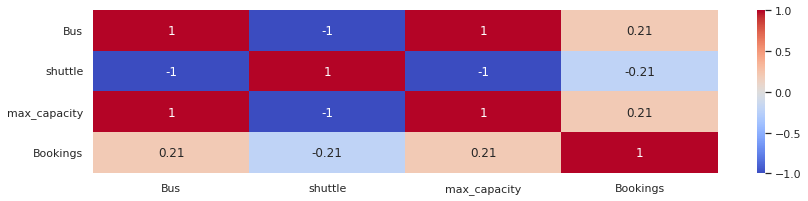

In [ ]:
#Heat map to check correlation
sns.heatmap(check.corr(),cmap='coolwarm',annot=True)
plt.show()

In [ ]:
#Drop features from above observation
df.drop(df[["travel_to","ride_id","payment_receipt","car_type","seat_number","payment_method"]],axis=1,inplace=True)

**Conclusion**
* We Drop all those Features which has all the values unique like payment_receipt and ride_id(as we extracted counts of ride_id).
* We Drop the feature travel_to as it has constant value  that is Nairobi.
* We Drop payment_method as this feature is imbalance.
* car_type nad max_capacity both are multicollinear which we validated with heat map.
* From the problem statement point of view seat no. is not an important feature in determining Bookings.so we drop that too.

#Feature Engineering

In [ ]:
#Check if Bookings more than maximum seat.
More_Bookings_less_seat=df[df['max_capacity']<df['Bookings']].index
display(df[df['max_capacity']<df['Bookings']], More_Bookings_less_seat ,len(index))

,travel_date,travel_time,travel_from,max_capacity,Bookings
1669,13-02-18,7:00,Kisii,11,12.0
1924,09-01-18,7:00,Sirare,49,50.0
1978,07-02-18,9:30,Kisii,11,12.0
2067,05-02-18,10:30,Kisii,11,12.0
2076,05-02-18,9:10,Kisii,11,12.0
2166,04-02-18,10:51,Kisii,11,12.0
2342,31-01-18,9:50,Kisii,11,12.0
3642,20-12-17,10:00,Kisii,11,12.0
3775,19-12-17,7:20,Kisii,11,12.0
4134,14-12-17,10:57,Kisii,11,12.0


Int64Index([1669, 1924, 1978, 2067, 2076, 2166, 2342, 3642, 3775, 4134, 4425,
            4670, 5020],
           dtype='int64')

13

In [ ]:
df.drop(index=More_Bookings_less_seat,inplace=True)

**Observation**
* we have 13 Bookings which are more than available seats hence we will drop them.

In [ ]:

display(df.head(5))



,travel_date,travel_time,travel_from,max_capacity,Bookings
0,17-10-17,7:15,Migori,49,1.0
1,19-11-17,7:12,Migori,49,1.0
2,26-11-17,7:05,Keroka,49,1.0
3,27-11-17,7:10,Homa Bay,49,5.0
4,27-11-17,7:12,Migori,49,31.0


**Travel_date**
* **Extracting years ,month ,days ,weeks,day_ofweek from travel_date**
* **Extracting hours from travel_time**

In [ ]:
#Import warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
#Extracting features from Date
df['year'] = pd.DatetimeIndex(df['travel_date']).year
df['month'] = pd.DatetimeIndex(df['travel_date']).month
df['day'] = pd.DatetimeIndex(df['travel_date']).day
df['week'] = pd.DatetimeIndex(df['travel_date']).week
df["day_ofweek"] = pd.DatetimeIndex(df["travel_date"]).dayofweek

df["hour"]=pd.DatetimeIndex(df["travel_time"]).hour

In [ ]:
print(df.shape)
df.sample(5)

(6236, 11)


,travel_date,travel_time,travel_from,max_capacity,Bookings,year,month,day,week,day_ofweek,hour
3915,21-02-18,6:00,Kijauri,11,1.0,2018,2,21,8,2,6
4447,04-03-18,5:10,Kijauri,11,4.0,2018,4,3,14,1,5
6013,15-04-18,7:09,Homa Bay,49,32.0,2018,4,15,15,6,7
5805,10-04-18,7:10,Homa Bay,49,2.0,2018,10,4,40,3,7
5111,17-03-18,7:05,Rongo,49,3.0,2018,3,17,11,5,7


In [ ]:
#drop travel date 
df.drop(["travel_date","travel_time"],axis=1, inplace=True)

**Time of Travel**
* converting time into minutes formate.
* Drop "travel_time" after conversion.

In [ ]:
# #express travel time in minutes
# # df1["Time"] = df1["travel_time"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
# df1.drop(["travel_time"],axis=1,inplace=True)


In [ ]:
# sns.set_theme(rc={'figure.figsize': (14,3)},style='whitegrid')
# plt.grid(False)
# plt.xlabel('')
# plt.title('Range of Time',size=15)
# ax = plt.gca()
# for spine in ax.spines.values():
#    spine.set_visible(False)

**Note**
* It will be better to segregate the time into different Periods of day.

In [ ]:
# #Convert minutes into hours with ceil value
# def calculate_time_period(travel_time_In_minutes):
#     time_period = np.ceil(travel_time_In_minutes / 60)
    
#     return time_period

# df1['Boarding_time'] = df1.Time.apply(calculate_time_period)
# df1.drop(["Time"],axis=1,inplace=True)

In [ ]:
# #Segregate hours into 4 periods of day.
# bins = [0, 6, 12, 18, 24]
# names = ['mid_night','morning', 'Afternoon', 'Evening']
# df1['Boarding_period'] = pd.cut(df1.Boarding_time, bins, labels=names)
# df1.drop(["Boarding_time"],axis=1,inplace=True)

In [ ]:
df.head(5)

,travel_from,max_capacity,Bookings,year,month,day,week,day_ofweek,hour
0,Migori,49,1.0,2017,10,17,42,1,7
1,Migori,49,1.0,2017,11,19,46,6,7
2,Keroka,49,1.0,2017,11,26,47,6,7
3,Homa Bay,49,5.0,2017,11,27,48,0,7
4,Migori,49,31.0,2017,11,27,48,0,7


# Outliers

**Target Variable**

In [ ]:
df[df["Bookings"]>=49]

,travel_from,max_capacity,Bookings,year,month,day,week,day_ofweek,hour
1640,Migori,49,49.0,2017,12,27,52,2,7
3762,Sirare,49,49.0,2018,2,19,8,0,19
4221,Kisii,49,49.0,2017,12,13,50,2,7
5757,Sirare,49,49.0,2018,9,4,36,1,19


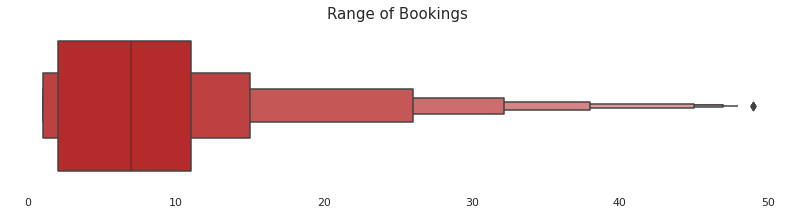

In [ ]:
sns.set_theme(rc={'figure.figsize': (14,3)},style='whitegrid')
sns.boxenplot(x=df['Bookings'],color='#CC1313')
plt.grid(False)
plt.xlabel('')
plt.title('Range of Bookings',size=15)
ax = plt.gca()
for spine in ax.spines.values():
   spine.set_visible(False)

In [ ]:
def out_iqr(df , column):
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    perc=(df1.shape[0]+ df2.shape[0]/len(df[column]))
    return print('Total number of outliers are',df1.shape[0]+ df2.shape[0],"In percentage",((df1.shape[0]+ df2.shape[0])*100/len(df[column])))
          

In [ ]:
out_iqr(df,"Bookings")

The IQR is 9.0
The lower bound value is -11.5
The upper bound value is 24.5
Total number of outliers are 419 In percentage 6.71905067350866


In [ ]:
df["Bookings"].skew()

2.052378171358655

**TRANSFORMING VALUES:**
1. Scalling
2. Log transformation
3. Cube Root Normalization
4. Box-Cox transformation

In [ ]:
df['Bookings']=df["Bookings"].astype(int)

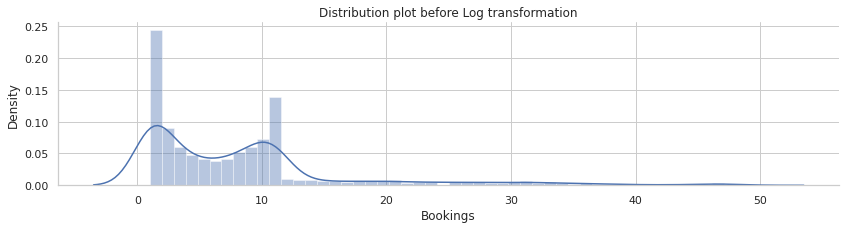

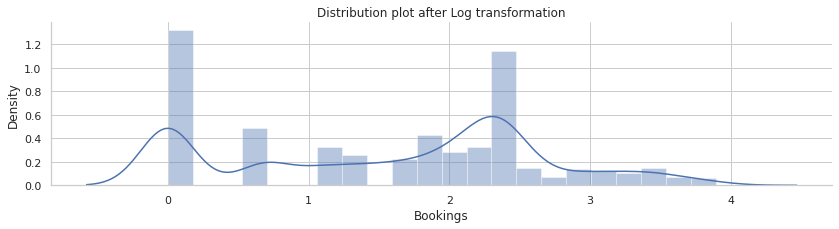

In [ ]:
#log trnsformation
sns.distplot(df['Bookings'])
plt.title("Distribution plot before Log transformation")
sns.despine()
plt.show()
# df1['log_Bookings'] = np.log(df['Bookings'])
sns.distplot(np.log(df['Bookings']))
plt.title("Distribution plot after Log transformation")
sns.despine()
plt.show()

**Quantile-based Capping**

In [ ]:
# df["Tickets"].quantile(0.90)

In [ ]:
# # df["Bookings"] = np.where(df["Bookings"] >=25, 19,df['Bookings'])
# df1["Bookings"]=np.log(df1['Bookings'])
# df1.Bookings.skew()

In [ ]:
# df1.describe()

**Boarding Time**

#EDA

**travel_from**

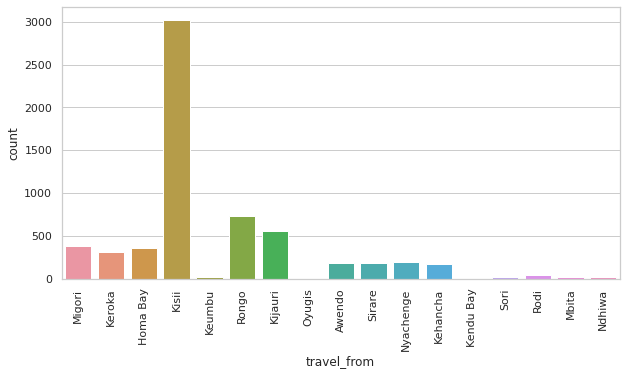

In [ ]:

plt.figure(figsize=(10,5))
sns.countplot(x="travel_from",data=df1)
plt.xticks(rotation=90)
plt.show()


**Observatio**
* In the dataset Majority of Travelling is between Kissi and Nairibi.
* Hence it could be that we have less data from other boarding station or we can Consider kissi as our major predictor.

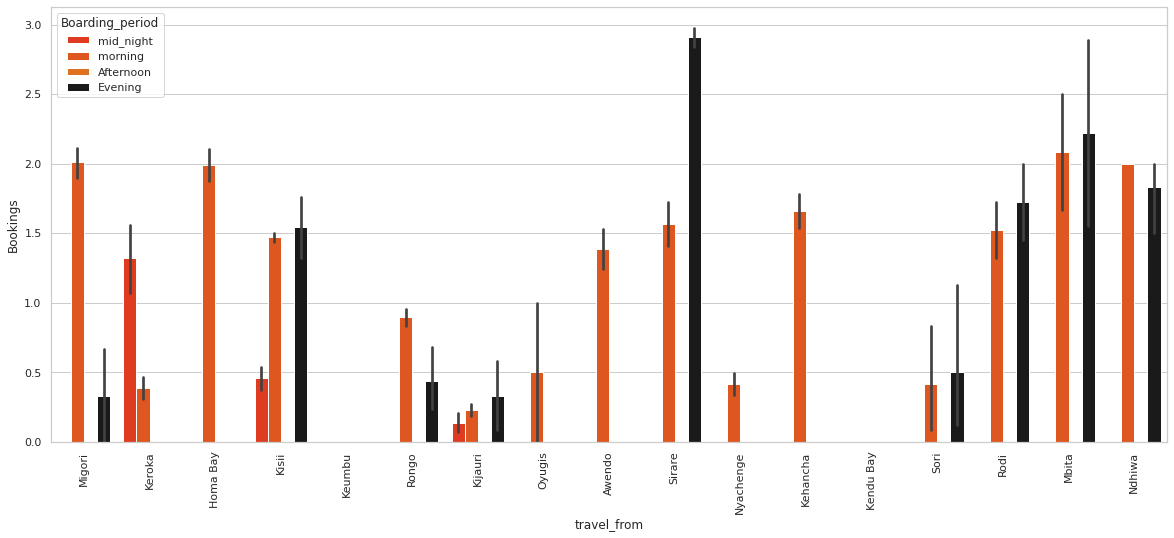

In [ ]:
sns.set_theme(palette='autumn',rc={'figure.figsize': (20,8)},style='whitegrid')
sns.barplot(x = 'travel_from',y = 'Bookings',hue="Boarding_period",data = df1,palette=["C0", "C1", "C2", "k"])
plt.xticks(rotation=90) 
# Show the plot
plt.show()

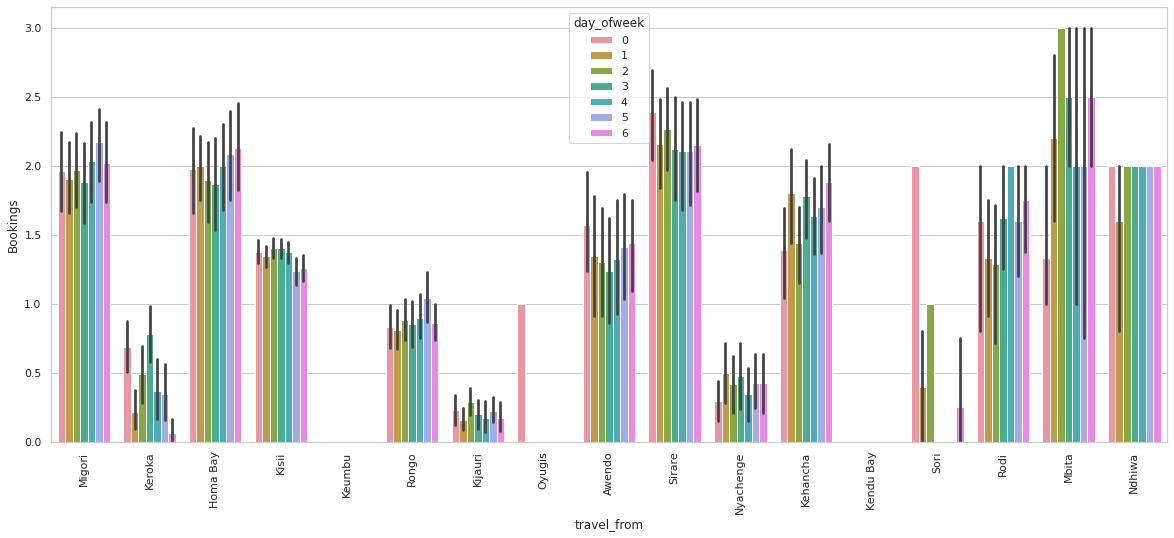

In [ ]:
sns.set_theme(palette='autumn',rc={'figure.figsize': (20,8)},style='whitegrid')
sns.barplot(x = 'travel_from',y = 'Bookings',hue="day_ofweek",data = df1)
plt.xticks(rotation=90) 
# Show the plot
plt.show()

**observatio:-**
* Major travelling happend during Afternoon and Evening. 

In [ ]:
##

**year**

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x="year", data=df1)
plt.show()

ValueError: ignored

<Figure size 360x360 with 0 Axes>

In [ ]:
sns.set_theme(palette='autumn',rc={'figure.figsize': (20,8)},style='whitegrid')
sns.barplot(x = 'year',y = 'Bookings',hue="day_ofweek",data = df1,palette=["C0", "C1", "C2", "k"])
plt.xticks(rotation=90) 
# Show the plot
plt.show()

**Observation**
* although we have less data for year 2017. still the travlling patter show approx same for both which shows there were more rides during 2017.
* there is no such pattern which indicate trend of travelling during weekends or during weekdays. 

**Days**

In [ ]:
df1.head()

In [ ]:
sns.countplot(x="day", data=df1)
plt.show()

In [ ]:
sns.set_theme(palette='autumn',rc={'figure.figsize': (20,8)},style='whitegrid')
sns.barplot(x = 'day',y = 'Bookings',hue="Boarding_period",data = df1,palette=["C0", "C1", "C2", "k"])
plt.xticks(rotation=90) 
# Show the plot
plt.show()

In [ ]:
sns.countplot(x="month", data=df1)
plt.show()

In [ ]:
sns.set_theme(palette='autumn',rc={'figure.figsize': (20,8)},style='whitegrid')
sns.barplot(x = 'month',y = 'Bookings',hue="max_capacity",data = df1,palette=["C0", "k"])
plt.xticks(rotation=90) 
# Show the plot
plt.show()

**Observation**
* Higher Travelling patter during December can back by festivals(christmas).
* There is no such favorite vehicle type for ride.

In [ ]:
df1.columns

**Data set Distribution**

In [ ]:

# visualize the relationship between the features and the response using scatterplots
Plot=df1[["Bookings","Boarding_period",'travel_from', 'month', 'day',
       'day_ofweek']]
sns.pairplot(Plot)
plt.show()

**Observation**
* we can clearly see this dataset has low linear relation.


In [ ]:
df.columns

In [ ]:
# df= pd.get_dummies(df, columns=["car_type","periods","travel_from"],drop_first=True)

#Feature Selection
We will use three methods for feature selection:

* Remove collinear features
* Remove features with greater than a threshold percentage of missing values
* Keep only the most relevant features using feature importances from a model


In [ ]:
df.head()

,travel_from,max_capacity,Bookings,year,month,day,week,day_ofweek,hour
0,Migori,49,1,2017,10,17,42,1,7
1,Migori,49,1,2017,11,19,46,6,7
2,Keroka,49,1,2017,11,26,47,6,7
3,Homa Bay,49,5,2017,11,27,48,0,7
4,Migori,49,31,2017,11,27,48,0,7


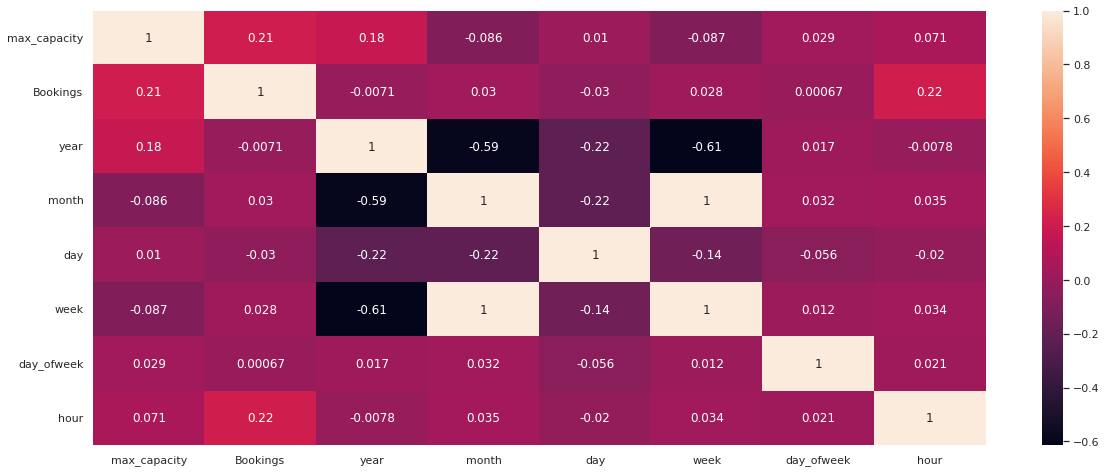

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
df.drop(["year","week"],axis=1,inplace=True)

**One Hot Encoding and Feature selection using Random Forest**

In [ ]:
one_hot = pd.get_dummies(df[["travel_from"]])

In [ ]:
one_hot=pd.DataFrame(one_hot)

In [ ]:
one_hot

,travel_from_Awendo,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Kendu Bay,travel_from_Keroka,travel_from_Keumbu,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6244,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6245,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6246,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6247,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

features = np.array(one_hot.columns)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(one_hot, df["Bookings"])

RandomForestClassifier()

In [ ]:
# from the calculated importances, order them from most to least important
# and make a barplot so we can visualize what is/isn't important
importances = clf.feature_importances_
sorted_idx = np.argsort(importances)

In [ ]:
importances

array([0.01405622, 0.04869673, 0.02555513, 0.0017179 , 0.08937061,
       0.03011221, 0.26751119, 0.27452833, 0.00887471, 0.04529864,
       0.02097802, 0.04614469, 0.00307154, 0.01576633, 0.05538934,
       0.04455851, 0.00836989])

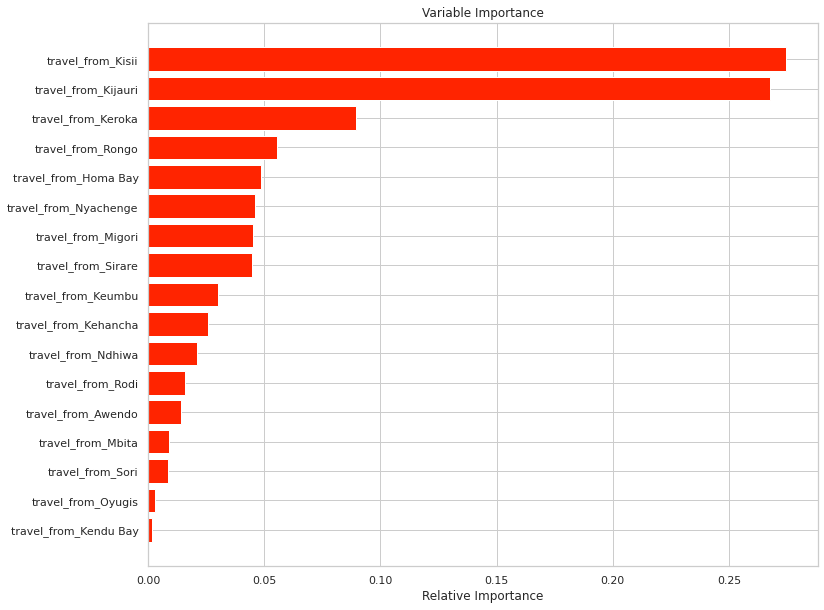

In [ ]:
plt.figure(figsize=(12, 10))
padding = np.arange(len(features)) + 0.5
plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

In [ ]:
# df.Boarding_period.value_counts()

AttributeError: ignored

In [ ]:
one_hot_imp=one_hot.copy()

In [ ]:
one_hot_imp=one_hot[['travel_from_Awendo', 'travel_from_Homa Bay', 'travel_from_Kehancha',
        'travel_from_Keroka','travel_from_Kijauri', 'travel_from_Kisii', 'travel_from_Migori', 'travel_from_Ndhiwa', 'travel_from_Nyachenge',
        'travel_from_Rodi', 'travel_from_Rongo','travel_from_Sirare']]

In [ ]:
one_hot_imp.head()


,travel_from_Awendo,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Kendu Bay,travel_from_Keroka,travel_from_Keumbu,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
Processed_df = pd.concat([df, one_hot_imp], axis=1)
Processed_df.drop(["travel_from"],axis=1,inplace=True)

**Observation**
* we have selected only important features which we extarcted.

In [ ]:
Processed_df.head()

,max_capacity,Bookings,month,day,day_ofweek,hour,travel_from_Awendo,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Kendu Bay,...,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori
0,49,1,10,17,1,7,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,49,1,11,19,6,7,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,49,1,11,26,6,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,49,5,11,27,0,7,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,49,31,11,27,0,7,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


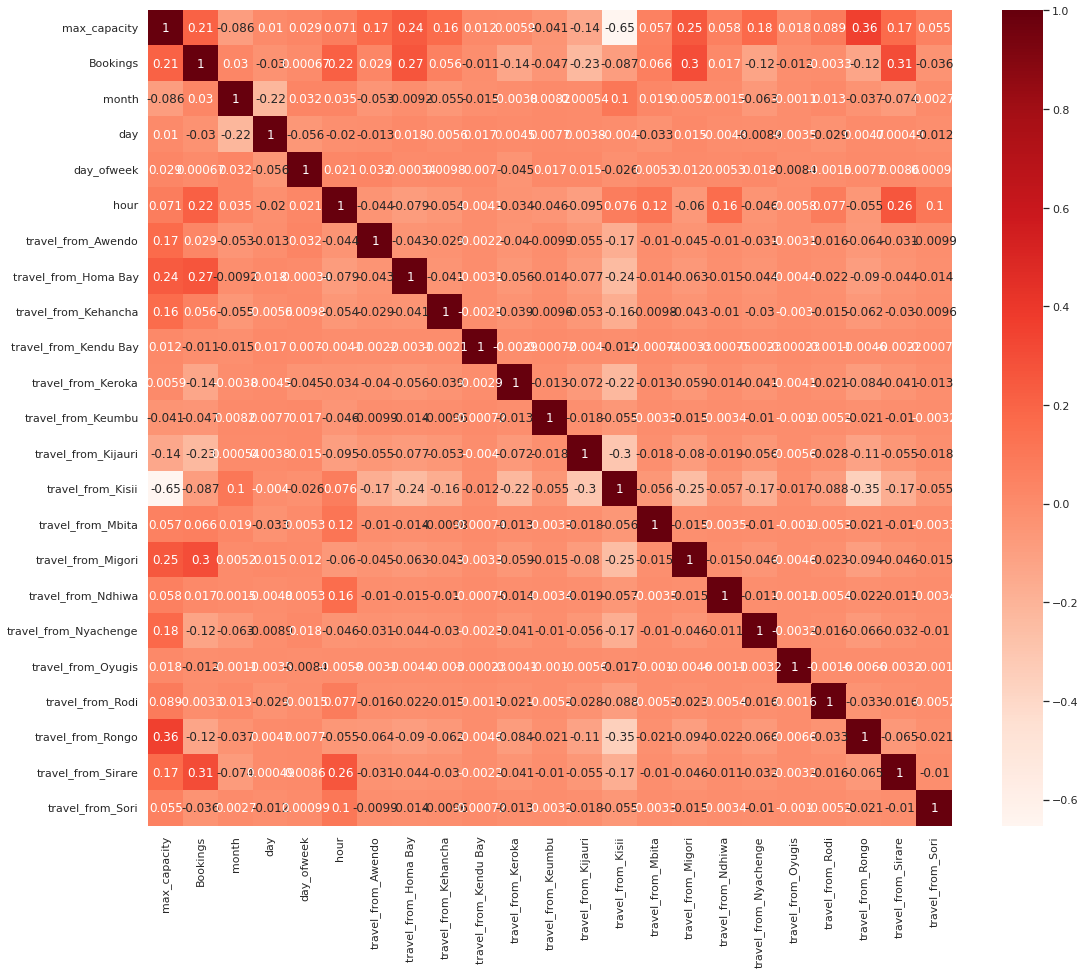

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(18,15))
cor =Processed_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#Train Test Split

In [ ]:
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
y = Processed_df['Bookings']
X = Processed_df.drop(['Bookings'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:
X_train.columns

Index(['max_capacity', 'month', 'day', 'day_ofweek', 'hour',
       'travel_from_Awendo', 'travel_from_Homa Bay', 'travel_from_Kehancha',
       'travel_from_Kendu Bay', 'travel_from_Keroka', 'travel_from_Keumbu',
       'travel_from_Kijauri', 'travel_from_Kisii', 'travel_from_Mbita',
       'travel_from_Migori', 'travel_from_Ndhiwa', 'travel_from_Nyachenge',
       'travel_from_Oyugis', 'travel_from_Rodi', 'travel_from_Rongo',
       'travel_from_Sirare', 'travel_from_Sori'],
      dtype='object')

In [ ]:
# Transforming data
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [ ]:

X_train.shape, X_test.shape
X_train.columns

Index(['max_capacity', 'month', 'day', 'day_ofweek', 'travel_from_Awendo',
       'travel_from_Homa Bay', 'travel_from_Kehancha', 'travel_from_Keroka',
       'travel_from_Kijauri', 'travel_from_Kisii', 'travel_from_Migori',
       'travel_from_Ndhiwa', 'travel_from_Nyachenge', 'travel_from_Rodi',
       'travel_from_Rongo', 'travel_from_Sirare', 'Boarding_period_mid_night',
       'Boarding_period_morning', 'Boarding_period_Evening'],
      dtype='object')


#Ml Models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import svm
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn import metrics

#Evaluate matrices
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square


In [ ]:

import statsmodels.api as sm
LR_model = LinearRegression(normalize=True)
LR_model.fit(X_train,y_train)
print(LR_model.coef_,"\n","Intercept/offset",LR_model.intercept_)
#fit OLS model
lm_sm=sm.OLS(y_train,X_train).fit()

[-1.80878069e-03  7.49915968e-02 -2.23222533e-02 -7.12096710e-02
  4.92099183e-01  5.86914976e+13  5.86914976e+13  5.86914976e+13
  5.86914976e+13  5.86914976e+13  5.86914976e+13  5.86914976e+13
  5.86914976e+13  5.86914976e+13  5.86914976e+13  5.86914976e+13
  5.86914976e+13  5.86914976e+13  5.86914976e+13  5.86914976e+13
  5.86914976e+13  5.86914976e+13] 
 Intercept/offset -58691497558026.49


In [ ]:
test_pred = LR_model.predict(X_test)
train_pred = LR_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print("Adjusted R2:-",1 - (1-LR_model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("\n____________________________________________")
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
print("Adjusted R2:-",1 - (1-LR_model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))


Test set evaluation:
_____________________________________
MAE: 4.6070087139423075
MSE: 43.517712910970054
RMSE: 6.5967956547834685
R2 Square 0.4078183538911151
__________________________________
Adjusted R2:- 0.39718325494058815

____________________________________________
Train set evaluation:
_____________________________________
MAE: 4.743155448075381
MSE: 47.034913993780386
RMSE: 6.858200492387226
R2 Square 0.36936985464177585
__________________________________
Adjusted R2:- 0.36657552167140706


**Reverse Log Transform the Predictions:**


In [ ]:
# inverse_log=np.expm1(y_test)
# inverse_log_pred = np.expm1(test_pred)

In [ ]:
# invese_log_pred

array([ 5.00139647,  3.37787085,  2.69735311, ...,  4.61581058,
        3.51243057, 10.10312458])

Text(0.5, 0, 'Index')

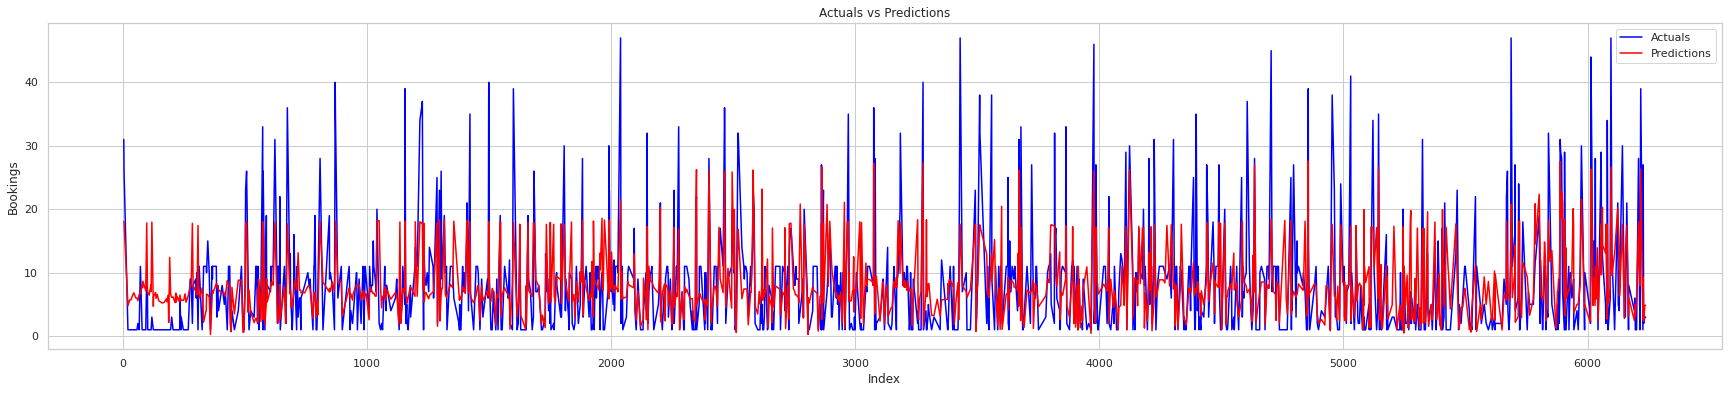

In [ ]:
fig, ax=plt.subplots(figsize=(30,6))
sns.lineplot(x=y_test.index,y=y_test,label='Actuals',color='blue',ax=ax)
sns.lineplot(x=y_test.index,y=test_pred,label='Predictions',color='red',ax=ax)
ax.set_title('Actuals vs Predictions')
ax.set_ylabel('Bookings')
ax.set_xlabel('Index')

**Observation**
* We can clearly see model is not able to predict properly.

#Linear Regression Assumptions Validation
1. Linearity of the model

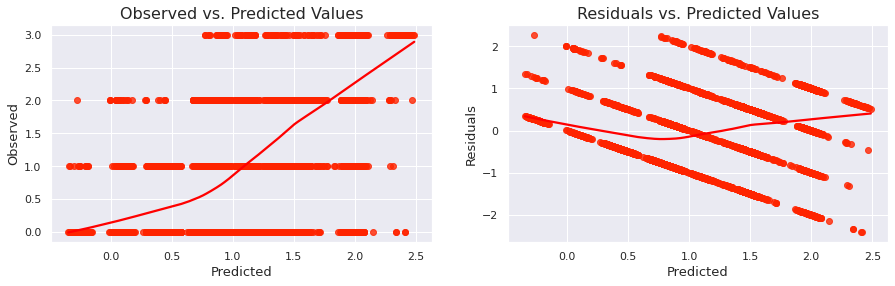

In [ ]:
def linearity_test(model, y):
    
    fitted_vals = model.predict()
    residuals = model.resid
    
    sns.set_style('darkgrid')
    fig,ax=plt.subplots(1,2, figsize=(15,4))
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set_xlabel('Predicted', fontsize=13)
    ax[0].set_ylabel('Observed', fontsize=13)
    
    sns.regplot(x=fitted_vals,y=residuals,lowess=True,ax=ax[1],line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set_xlabel('Predicted', fontsize=13)
    ax[1].set_ylabel('Residuals', fontsize=13)
    
linearity_test(lm_sm, y_train)

2. Homoscedasticity (equal variance) of residuals

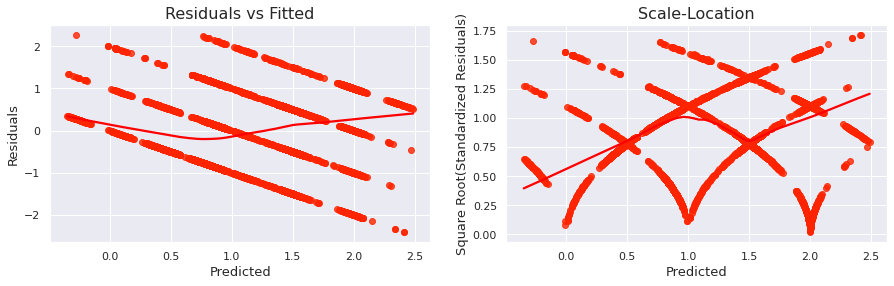

In [ ]:
import statsmodels.stats.api as sms

def homoscedasticity_test(model):
    
    fitted_vals = model.predict()
    residuals = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal
    
    sns.set_style('darkgrid')
    
    
    fig, ax = plt.subplots(1,2,figsize=(15,4))

    sns.regplot(x=fitted_vals, y=residuals, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set_xlabel('Predicted', fontsize=13)
    ax[0].set_ylabel('Residuals', fontsize=13)

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set_xlabel('Predicted', fontsize=13)
    ax[1].set_ylabel('Square Root(Standardized Residuals)', fontsize=13)

      
homoscedasticity_test(lm_sm)

**Residuals**
Ploting a histogram of the residuals and making sure it looks normally distributed.

Text(0.5, 1.0, 'Q-Q plot')

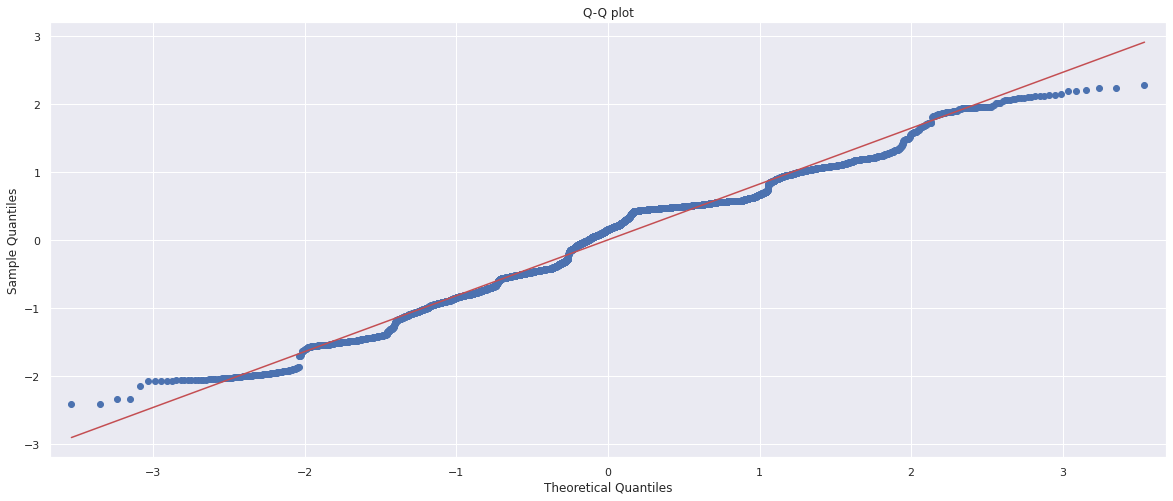

In [ ]:
sm.ProbPlot(lm_sm.resid).qqplot(line='s')
plt.title('Q-Q plot')

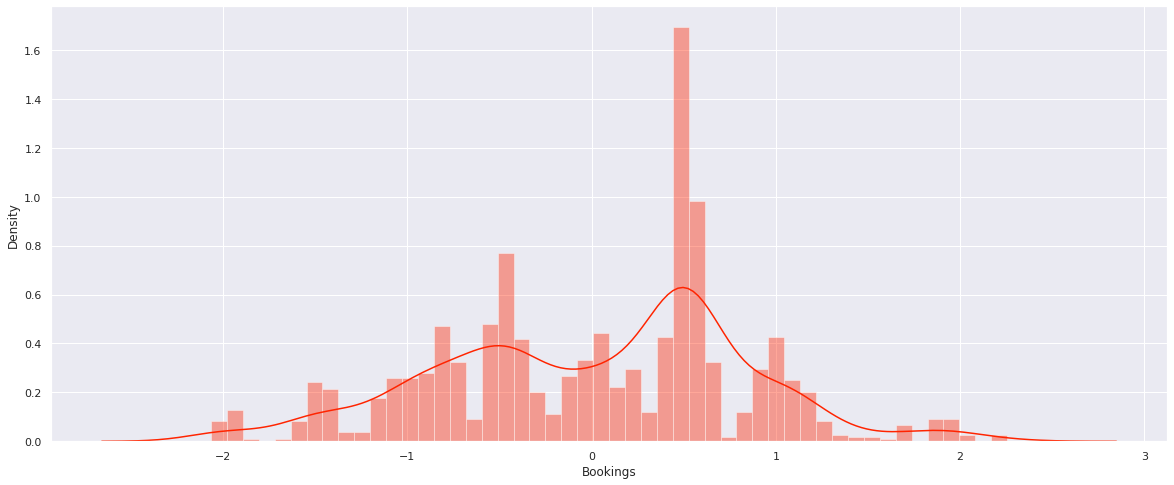

In [ ]:
sns.distplot((y_test-test_pred),bins=50);

#SVM

In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=10, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


Test set evaluation:
_____________________________________
MAE: 0.544224731735955
MSE: 0.7252221441708847
RMSE: 0.8515997558541716
R2 Square 0.27727605233557007
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.5309986940749887
MSE: 0.7110793363926039
RMSE: 0.8432552024106367
R2 Square 0.2831164892156671
__________________________________


#XGB

In [ ]:
import xgboost as xgb
XGB= xgb.XGBRegressor(
                        booster= 'gbtree',
                        colsample_bylevel= 1,
                        colsample_bynode= 1,
                        colsample_bytree= 0.7,
                        eta= 0.004,
                        gamma= 0,
                        importance_type= 'gain',
                        learning_rate= 0.1,
                        max_delta_step= 0,
                        max_depth= 9,
                        min_child_weight= 10,
                        n_estimators= 100,
                        n_jobs= 1,
                        objective= 'reg:linear',
                        random_state= 0,
                        reg_alpha= 0,
                        reg_lambda= 1,
                        scale_pos_weight= 1,
                        subsample= 1,
                        verbosity= 1)
XGB.fit(X_train, y_train)
train_pred=XGB.predict(X_train)
test_pred = XGB.predict(X_test)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
  

[22:04:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test set evaluation:
_____________________________________
MAE: 4.057182957322743
MSE: 41.81528448262571
RMSE: 6.466473883240054
R2 Square 0.43098471079829026
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.5237582820350397
MSE: 29.168914615781357
RMSE: 5.400825364310658
R2 Square 0.6089118635036891
__________________________________


In [ ]:
params = {"min_child_weight":[10,20], 
            'eta': [0.004,0.04,4,40], 
            'colsample_bytree':[0.7], 
            'max_depth': [7,9,11],
          
          }

import xgboost as xgb

xgb = xgb.XGBRegressor(random_state=0)          

In [ ]:
reg_gs = GridSearchCV(xgb,param_grid=params, verbose=1,cv=3)
reg_gs.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[21:50:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:38] WARNING: /workspace/src/objective/regre

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'colsample_bytree': [0.7], 'eta': [0.004, 0.04, 4, 40],
                         'max_depth': [7, 9, 11],
                         'min_child_weight': [10, 20]},
             verbose=1)

In [ ]:
reg_gs.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'eta': 0.004,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 7,
 'min_child_weight': 20,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
reg_optimal_model =reg_gs.best_estimator_

reg_optimal_model.fit(X_train, y_train)
train_pred=reg_optimal_model.predict(X_train)
test_pred = reg_optimal_model.predict(X_test)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
  

[21:53:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test set evaluation:
_____________________________________
MAE: 4.1323433038898
MSE: 40.86288188603041
RMSE: 6.392408144512552
R2 Square 0.4439448435737424
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.835929926995669
MSE: 33.544529008451946
RMSE: 5.79176389439797
R2 Square 0.5502449264099745
__________________________________


In [ ]:
print(reg_optimal_model.feature_importances_)
plt.bar(range(len(reg_optimal_model.feature_importances_)), reg_optimal_model.feature_importances_)
plt.show()

[0.01077113 0.00644853 0.00792863 0.00496272 0.04452211 0.01542199
 0.30031833 0.02229324 0.         0.04564146 0.         0.05613079
 0.02967249 0.         0.18588404 0.         0.05243083 0.
 0.0021233  0.02527186 0.19017857 0.        ]


AttributeError: ignored

#Decision Treee Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeRegressor(random_state = 0,max_depth=50,max_leaf_nodes=50)
DT_model.fit(X_train,y_train)

test_pred = DT_model.predict(X_test)
train_pred = DT_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print("Adjusted R2:-",1 - (1-DT_model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
print("Adjusted R2:-",1 - (1-DT_model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

Test set evaluation:
_____________________________________
MAE: 4.297580881945608
MSE: 41.6575032648996
RMSE: 6.454262410601199
R2 Square 0.4331317708110548
__________________________________
Adjusted R2:- 0.4229512801643962
Train set evaluation:
_____________________________________
MAE: 4.072722381352895
MSE: 35.399162298016904
RMSE: 5.949719514230642
R2 Square 0.5253785545667261
__________________________________
Adjusted R2:- 0.5232754988165687


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 0,max_depth=15)
grid_values = {'n_estimators':[12,20,30,50, 80,  100, 120], 'max_depth':[5, 10, 15, 20,25,30,35,40]}
random_forest = GridSearchCV(regressor, param_grid = grid_values, cv=5)
random_forest.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=15, n_estimators=32,
                                             random_state=0),
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30, 35, 40],
                         'n_estimators': [12, 20, 30, 50, 80, 100, 120]})

In [ ]:
test_pred = random_forest.predict(X_test)
train_pred = random_forest.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print("Adjusted R2:-",1 - (1-random_forest.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
print("Adjusted R2:-",1 - (1-random_forest.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

Test set evaluation:
_____________________________________
MAE: 4.766365336226102
MSE: 43.52252388415571
RMSE: 6.597160289409051
R2 Square 0.40775288698511525
__________________________________
Adjusted R2:- 0.3971166123023989
Train set evaluation:
_____________________________________
MAE: 4.647330978139844
MSE: 40.71309469525771
RMSE: 6.380681366065674
R2 Square 0.4541309285895875
__________________________________
Adjusted R2:- 0.4517121733889774


In [ ]:
# view the feature scores

feature_scores = pd.Series(random_forest.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

AttributeError: ignored

**Random Forest with HyperParameter Parameter tuning.**

In [ ]:
#Parameter
n_estimators = [1000] # number of trees in the random forest
max_features = [0.4,0.5,0.6,0.7,0.8,0.9,1] 
# number of features in consideration at every split
max_samples = [0.4,0.5,0.6,0.7,0.8,0.9,1]
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
# min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1,2,3,4,5,6, 7,8,9,10,11,12,13,14,15]
# min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

# 'min_samples_s': min_samples_,

'min_samples_leaf': min_samples_leaf,
"max_samples" : max_samples,

'bootstrap': bootstrap}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf_reg,param_distributions = random_grid,
               n_iter = 100, cv = 15, verbose=2, random_state=35, n_jobs = -1)


rf_random.fit(X_train, y_train)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


RandomizedSearchCV(cv=15, estimator=RandomForestRegressor(n_estimators=1000),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': [0.4, 0.5, 0.6, 0.7,
                                                         0.8, 0.9, 1],
                                        'max_samples': [0.4, 0.5, 0.6, 0.7, 0.8,
                                                        0.9, 1],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15],
                                        'n_estimators': [1000]},
    

In [ ]:
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_)

Best Parameters:  {'n_estimators': 1000, 'min_samples_leaf': 6, 'max_samples': 0.5, 'max_features': 0.6, 'max_depth': 100, 'bootstrap': True}


In [ ]:
randm_hyper = RandomForestRegressor(n_estimators = 1000, min_samples_leaf = 6,max_samples=0.5, max_features = 0.4, max_depth= 80, bootstrap=True) 
randm_hyper.fit( X_train, y_train) 

test_pred = randm_hyper.predict(X_test)
train_pred = randm_hyper.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)



Test set evaluation:
_____________________________________
MAE: 0.66780333502088
MSE: 0.7216071677760251
RMSE: 0.8494746422207229
R2 Square 0.41496572225691297
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.6205812384031207
MSE: 0.629746162741261
RMSE: 0.7935654747664247
R2 Square 0.48149524145033373
__________________________________


In [ ]:
# view the feature scores

feature_scores = pd.Series(randm_hyper.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

ValueError: ignored

In [ ]:
randm_hyper.feature_importances_
# plt.barh(df1.columns, randm_hyper.feature_importances_)

array([0.69657594, 0.1369834 , 0.12502581, 0.04141485])

#Improving feature

**Improving Accuracy with Tree base model after working on features in different manner**

In [ ]:
df.head()

,travel_date,travel_time,travel_from,max_capacity,Bookings
0,17-10-17,7:15,Migori,49,1.0
1,19-11-17,7:12,Migori,49,1.0
2,26-11-17,7:05,Keroka,49,1.0
3,27-11-17,7:10,Homa Bay,49,5.0
4,27-11-17,7:12,Migori,49,31.0


In [ ]:
df2=df.copy()
# df2.drop(["max_capacity","day_of_year"],axis=1,inplace=True)

In [ ]:
df2.head()

,travel_from,max_capacity,Bookings,month,day,day_ofweek,hour
0,Migori,49,1,10,17,1,7
1,Migori,49,1,11,19,6,7
2,Keroka,49,1,11,26,6,7
3,Homa Bay,49,5,11,27,0,7
4,Migori,49,31,11,27,0,7


In [ ]:
df2["hour"]=pd.DatetimeIndex(df2["travel_time"]).hour
df2['week'] = pd.DatetimeIndex(df2['travel_date']).week
df2["day_ofweek"] = pd.DatetimeIndex(df2["travel_date"]).dayofweek
df2["day_of_year"]=pd.DatetimeIndex(df2["travel_date"]).dayofyear
df2.drop(["travel_date"],axis=1,inplace=True)
df2.drop(["travel_time"],axis=1,inplace=True)

**Target Encoding**

* Target encoding is great for:
  * High-cardinality features: A feature with a large number of categories can be troublesome to encode: a one-hot encoding would generate too many features and alternatives, like a label encoding, might not be appropriate for that feature. A target encoding derives numbers for the categories using the feature's most important property: its relationship with the target.

* Domain-motivated features:
 *  we know that a categorical feature should be important even if it scored poorly with a feature metric. A target encoding can help reveal a feature's true informativeness.


In [ ]:
#express travel time in minutes
df2["Time"] = df2["travel_time"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
df2.drop(["travel_time"],axis=1,inplace=True)

In [ ]:
#Convert minutes into hours with ceil value
def calculate_time_period(travel_time_In_minutes):
    time_period = np.ceil(travel_time_In_minutes / 60)
    
    return time_period

df2['Boarding_time'] = df2.Time.apply(calculate_time_period)
df2.drop(["Time"],axis=1,inplace=True)

In [ ]:
#Segregate hours into 4 periods of day.
bins = [0, 6, 12, 18, 24]
names = ['mid_night','morning', 'Afternoon', 'Evening']
df2['Boarding_period'] = pd.cut(df2.Boarding_time, bins, labels=names)
df2.drop(["Boarding_time"],axis=1,inplace=True)

In [ ]:
df2.head()

,travel_from,Bookings,hour
0,Migori,1.0,7
1,Migori,1.0,7
2,Keroka,1.0,7
3,Homa Bay,5.0,7
4,Migori,31.0,7


In [ ]:
pip install category_encoders

In [ ]:
# from category_encoders import MEstimateEncoder
import category_encoders as ce
encoder = ce.MEstimateEncoder(cols=["travel_from"])
# X_pretrain = X.drop(X.index)
# Create the encoder instance. Choose m to control noise.
# encoder = MEstimateEncoder(m=5.0)
X = df2.drop(['Bookings'], axis=1)
# Fit the encoder on the encoding split.
encoder.fit(X, y)

# Encode the Zipcode column to create the final training data
x = encoder.transform(X)




In [ ]:
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
y = df2['Bookings']
# X = df2.drop(['Bookings'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4988, 6), (1248, 6), (4988,), (1248,))

In [ ]:

print(x.shape)
x.head()

(6236, 6)


,travel_from,max_capacity,month,day,day_ofweek,hour
0,18.178942,49,10,17,1,7
1,18.178942,49,11,19,6,7
2,3.154649,49,11,26,6,7
3,17.681374,49,11,27,0,7
4,18.178942,49,11,27,0,7


In [ ]:
x_train["travel_from"].value_counts()

1.683506    2407
1.251001     613
0.412373     449
2.449617     315
2.419497     270
0.727770     243
2.742376     160
1.761039     153
0.725192     149
2.146731     134
1.905115      41
2.269238      20
0.141090      15
0.748377      15
2.566617      14
0.987627       1
Name: travel_from, dtype: int64

#Decision Tree

In [ ]:
DT_model = DecisionTreeRegressor(random_state = 0,max_depth=50,max_leaf_nodes=50)
DT_model.fit(x_train,y_train)
test_pred = DT_model.predict(x_test)
train_pred = DT_model.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print("Adjusted R2:-",1 - (1-DT_model.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
print("Adjusted R2:-",1 - (1-DT_model.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))

Test set evaluation:
_____________________________________
MAE: 4.316977290927875
MSE: 43.80023640336518
RMSE: 6.618174703297366
R2 Square 0.4039738221912701
__________________________________
Adjusted R2:- 0.40109214848711827
Train set evaluation:
_____________________________________
MAE: 4.077521383202441
MSE: 36.739926743674786
RMSE: 6.061346941371594
R2 Square 0.5074019834313312
__________________________________
Adjusted R2:- 0.5068086109961953


In [ ]:
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeRegressor()
DT_model.fit(x_train,y_train)

test_pred = DT_model.predict(x_test)
train_pred = DT_model.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 4.483495970736328
MSE: 46.72680252112102
RMSE: 6.835700587439522
R2 Square 0.3847843736741212
__________________________________
Train set evaluation:
_____________________________________
MAE: 4.290609954557243
MSE: 40.1846065343609
RMSE: 6.339132948153154
R2 Square 0.4581050339874271
__________________________________


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(x_train, y_train)

test_pred = rf_reg.predict(x_test)
train_pred = rf_reg.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)



Test set evaluation:
_____________________________________
MAE: 4.483630622121189
MSE: 46.73022933161345
RMSE: 6.835951238241351
R2 Square 0.38473925551388655
__________________________________
Train set evaluation:
_____________________________________
MAE: 4.290970128603687
MSE: 40.185391553269646
RMSE: 6.339194866327241
R2 Square 0.4580944478990824
__________________________________


In [ ]:
randm_hyper = RandomForestRegressor(n_estimators = 1000, min_samples_leaf = 6,max_samples=0.5, max_features = 0.4, max_depth= 80, bootstrap=True) 
randm_hyper.fit( x_train, y_train) 

test_pred = randm_hyper.predict(x_test)
train_pred = randm_hyper.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)



Test set evaluation:
_____________________________________
MAE: 4.499718649025173
MSE: 46.86762729468881
RMSE: 6.845993521373564
R2 Square 0.3829302429269221
__________________________________
Train set evaluation:
_____________________________________
MAE: 4.328548056493587
MSE: 40.630811662202056
RMSE: 6.37423027997907
R2 Square 0.4520878962464028
__________________________________
